<a href="https://colab.research.google.com/github/vaishhh17/mlprojects-/blob/main/Big_mart_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#Importing dataset

big_mart_data = pd.read_csv('/content/Train(1).csv')

In [3]:
# Printing the first 5 rows

big_mart_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_data.shape

(8523, 12)

In [5]:
# Getting info

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#checking for null values

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values


Mean -> Average value

Mode -> Most repeated value

In [7]:
# Mean value of "item weight" column

big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
big_mart_data['Item_Weight'].median()

12.6

In [9]:
#filling the missing values in "Item Weight" column with "Mean" value

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [10]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Types of filling the missing values in the dataset


1. 'pad' method [column wise]
2. 'bfill'(backward fill)  method [column wise] -
3. 'pad' method but [row wise] - filling the value with the value from previous row
4. 'bfill' method but [row wise] - filling the value with the value from the next row
5. mean,mode,max method
6. dropna method - drops the row or column of the missing value

   -> 'how' parameter - can use 'any' or 'all' in it
   -> 'any' means, drop the row with any null value
   
   -> 'all' means, if the whole row has null values then and only drop it
7. replace method
8. interpolate method

In [11]:
mode_outlet_size= big_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = big_mart_data ['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [14]:
# Replace the missing values with mode

big_mart_data.loc[missing_values, 'Outlet_Size']= big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size)

# big_mart_data.loc to locate the missing values in the Outlet size column
# lambda function created to replace the missing values

In [15]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [16]:
#Statistical measures for numerical columns

big_mart_data.describe()

# 25 percentage of values are less that 9.31 and so on for 50 and 70#

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
sns.set()

# Visualization for Numerical Data

<ipython-input-18-bd4b7e071440>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


<function matplotlib.pyplot.show(close=None, block=None)>

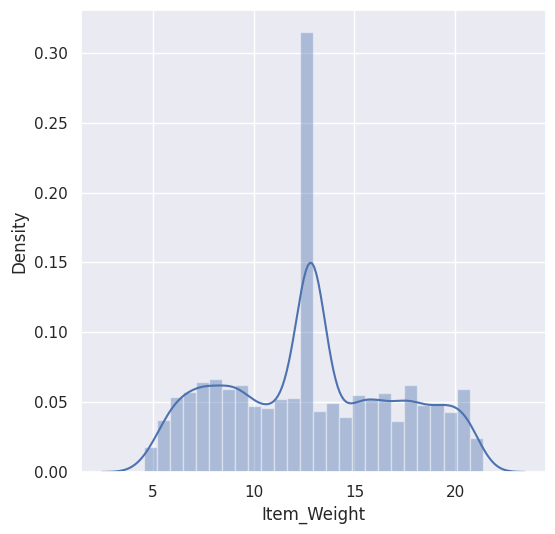

In [18]:
# Item weight distribution

plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show

<ipython-input-19-9611bb6d2a1f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Weight"], ax=ax1)
<ipython-input-19-9611bb6d2a1f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Visibility"], ax=ax2)
<ipython-input-19-9611bb6d2a1f>:15: UserWarning: 

`d

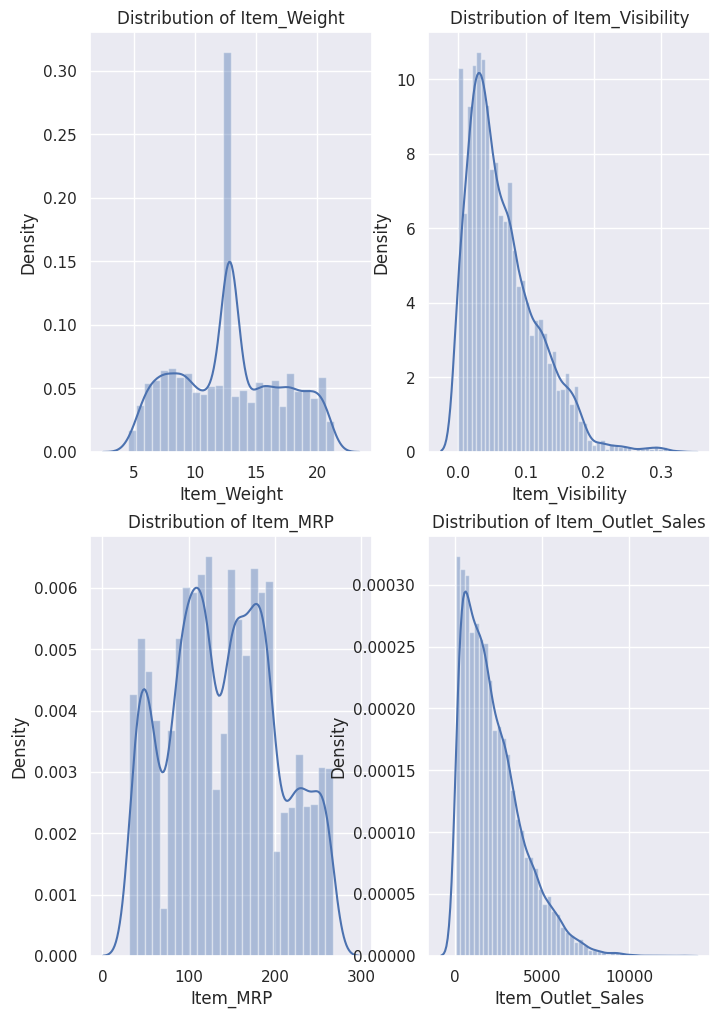

In [19]:
fig = plt.figure(figsize=(8, 12))

# Add the first distplot to the first subplot
ax1 = fig.add_subplot(2, 2, 1)
sns.distplot(big_mart_data["Item_Weight"], ax=ax1)
ax1.set_title('Distribution of Item_Weight')

# Add the second distplot to the second subplot
ax2 = fig.add_subplot(2, 2, 2)
sns.distplot(big_mart_data["Item_Visibility"], ax=ax2)
ax2.set_title('Distribution of Item_Visibility')

# Add the third distplot to the third subplot
ax3 = fig.add_subplot(2, 2, 3)
sns.distplot(big_mart_data["Item_MRP"], ax=ax3)
ax3.set_title('Distribution of Item_MRP')

# Add the fourth distplot to the third subplot
ax3 = fig.add_subplot(2, 2, 4)
sns.distplot(big_mart_data["Item_Outlet_Sales"], ax=ax3)
ax3.set_title('Distribution of Item_Outlet_Sales')



plt.show()

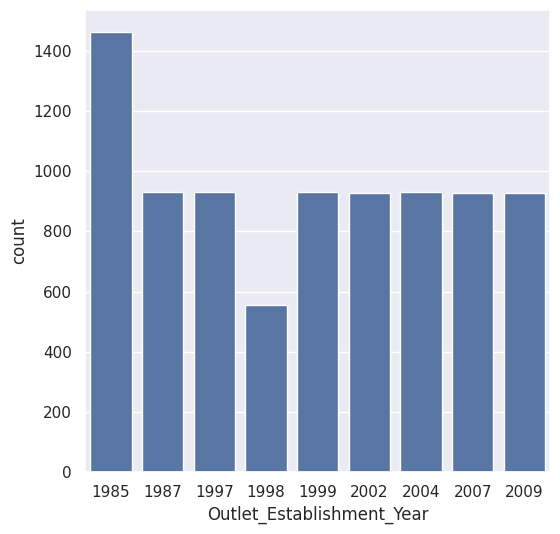

In [20]:
# Outlet_Establishment_Year colum

plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data=big_mart_data)
plt.show()

# Visualization for Categorical columns

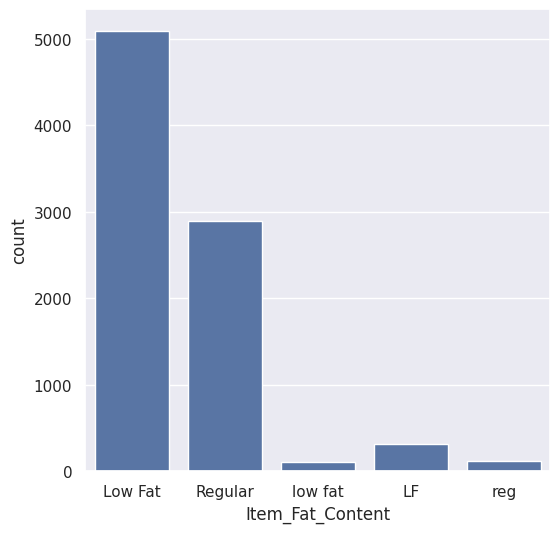

In [21]:
#Item_Fat_Content column

plt.figure(figsize = (6,6))
sns.countplot(x='Item_Fat_Content', data= big_mart_data)
plt.show()

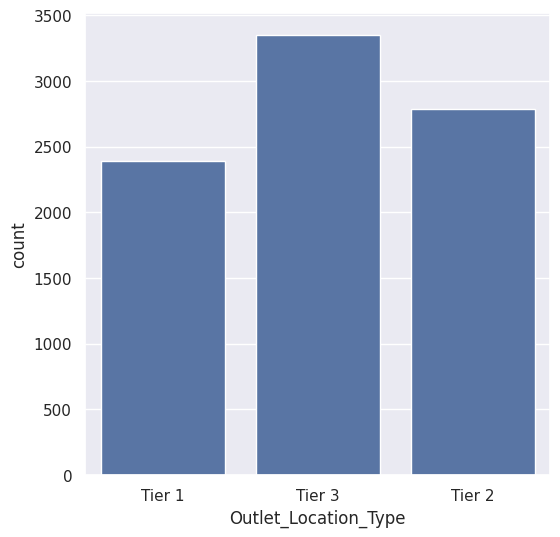

In [22]:
#Outlet_Location_Type column

plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Location_Type', data= big_mart_data)
plt.show()

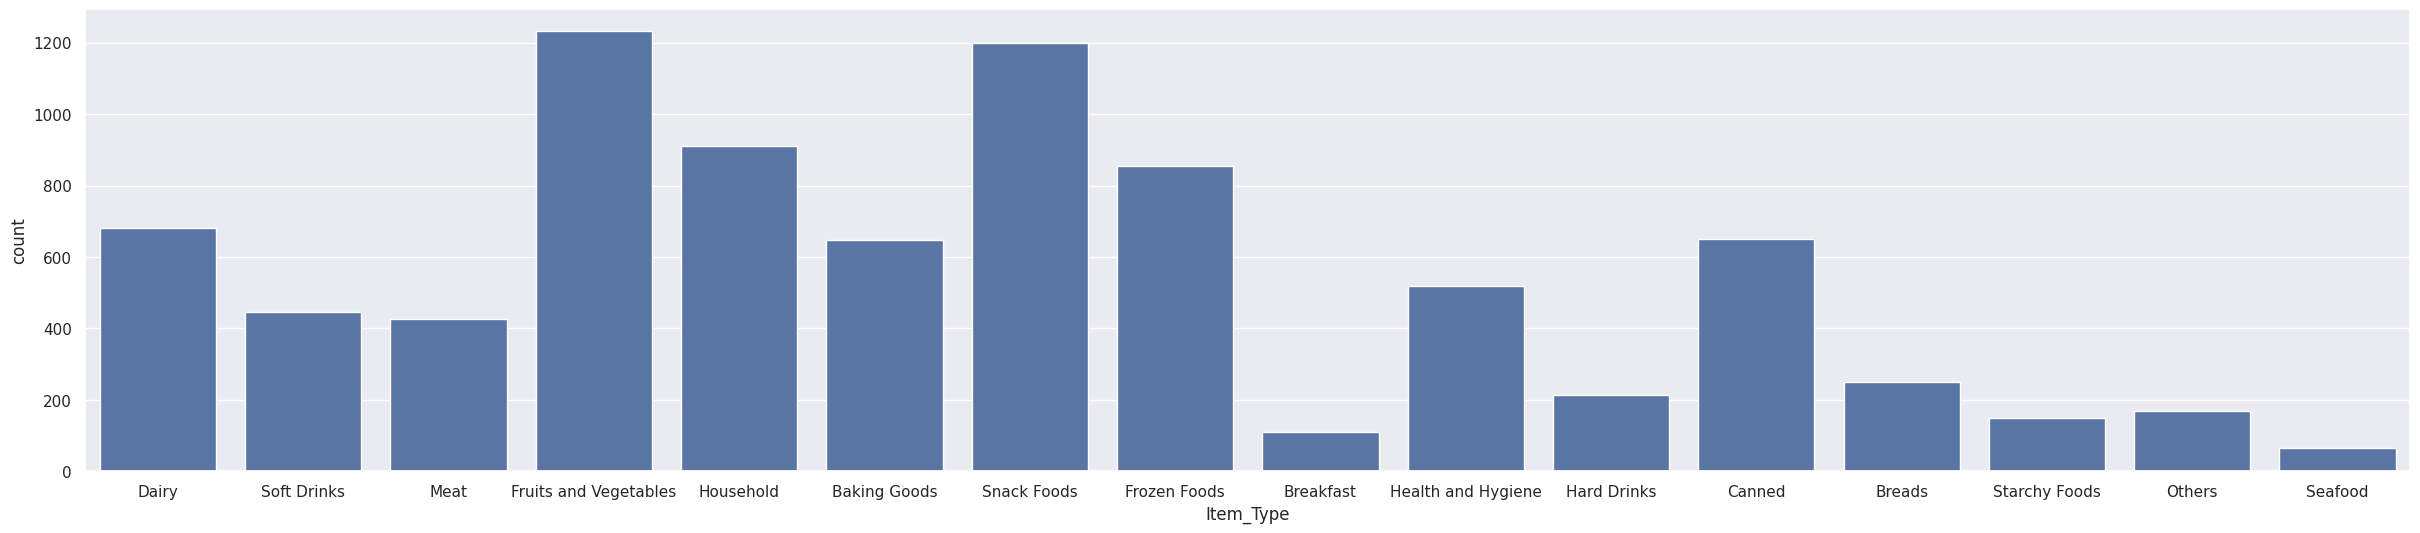

In [23]:
#Item_Type column

plt.figure(figsize = (30,6))
sns.countplot(x='Item_Type', data= big_mart_data)
plt.show()

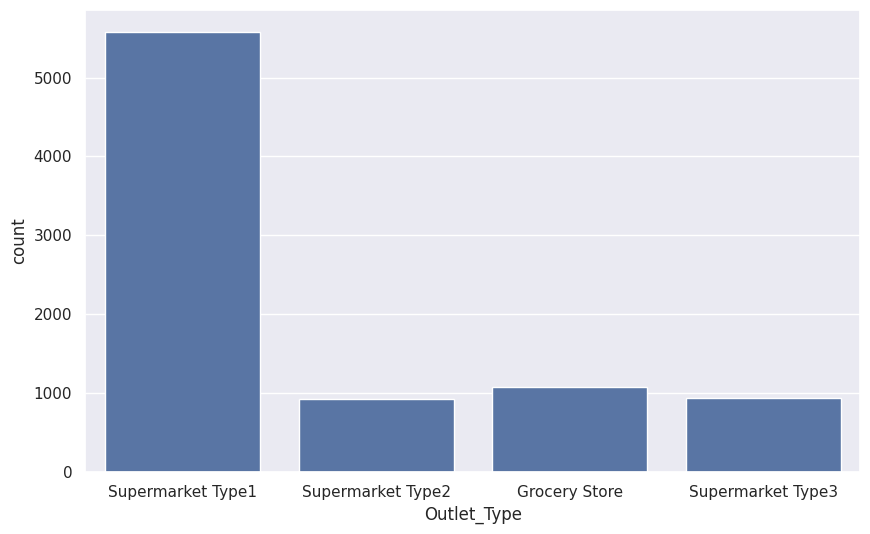

In [24]:
#Item_Fat_Content column

plt.figure(figsize = (10,6))
sns.countplot(x='Outlet_Type', data= big_mart_data)
plt.show()

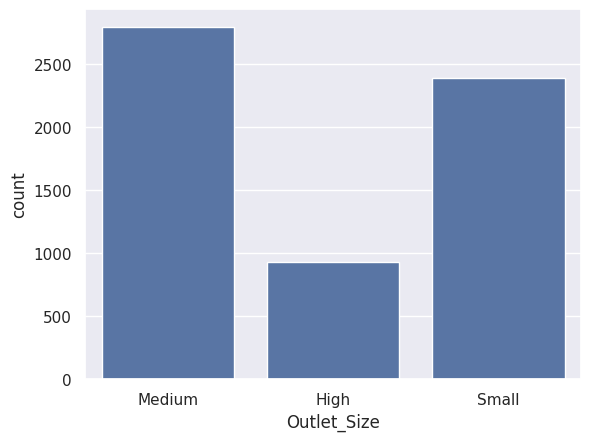

In [25]:
# Plot for Outlet_Size

import seaborn as sns
import matplotlib.pyplot as plt

big_mart_data = pd.read_csv('/content/Train(1).csv')

# Plotting with sns.countplot()
sns.countplot(x='Outlet_Size', data=big_mart_data)

# Show the plot
plt.show()


# Data Preprocessing
## Label Encoding

- Since categorical data (string values)cant be fed to the ML model, so we convert categorical to numerical data using Label Encoding

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
# combine the reg and LF content in the regular and low fat columns

big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
# Label Encoding

encoder = LabelEncoder()

In [31]:
# Converting

big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [32]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# Splitting Freatures and Target

In [33]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [34]:
print(X), print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

(None, None)

In [35]:
X.shape, Y.shape

((8523, 11), (8523,))

Splitting data into training and testing data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [37]:
X.shape, Y.shape, X_train.shape, X_test.shape

((8523, 11), (8523,), (6818, 11), (1705, 11))

Training the ML model

# XG Boost Regressor

In [38]:
regressor = XGBRegressor()

In [39]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

# New Section

In [40]:
#Prediction on training data

training_data_prediction = regressor.predict(X_train)

In [41]:
# R square value

r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [42]:
print('R-squared value = ', r2_train)

R-squared value =  0.883973594027199


In [43]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test
                                         )
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [44]:
print('R-squared value = ', r2_test)

R-squared value =  0.5288136562032192
